## 생성모델


1. AI(Artificial Intelligence) 
2. ML(Machine Learning) 
3. **RL(Representation Learning)**
4. DL(Deep Learning)


### Representation Learning
- 추상적인 특징을 추출
    - Auto-encoder, Variational Auto-encoder
    - GAN
- 학습 잘 안되고 느림
- 데이터가 없는 경우 생성모델을 이용해서 데이터 확보 실제로는 불가


#### AutoEncoder
- 학습을 통해서 데이터의 추상적인 특징을 추출해서 다시 복원 
    - Encoder: 이미지의 특징을 추상화해서 간략하게 표현
    - Decoder: 간략하게 표현한 것을 다시 원본처럼 복원
> abstraction(추상화) : 불필요한 것을 제거해서 작게 표현


> 시사인 얀르쿤 인터뷰(2008) 참고:https://www.sisain.co.kr/news/articleView.html?idxno=32487


#### Autoencoder 3요소 
1. loss function
    - 비지도학습:자기 자신와 생성된 이미지와 비교
2. encoding function
    - 원본에 대한 압축된 표현
3. decoding function
    - 원본에 가깝게압축 해제 복원

-  활용
    - 고유의 특성을 학습해서 복원하기 때문에 노이즈 제거, 이상치 탐색 가능
#### 구조
- Deep/stacked Autoencoder: 여러개의 encoder, decoder
    - 추상화 단계가 급격하지 않음
    
- Keras autoencoder(2016): https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/

In [1]:
import tensorflow as tf

(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data() # y값 불필요
#scaling
X_train=X_train/255
X_test=X_test/255
#input=784
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

##함수형 패러다임 
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(32, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

#multi-inputs,multi-outputs 지원
autoencoder = tf.keras.Model(input_img, decoded)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam') 
autoencoder.fit(X_train,X_train, epochs=20, batch_size=128)

# loss가 변하지 않음(Plateau)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0937
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0936
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0935
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0934
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0934
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0934
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0933
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0933
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0932
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0932
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0932
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0931
Epoch 13/20
469/469 [====

원래이미지와 autoencoder 통해 복원된 이미지 비교
    
- 압축,해제과정에서 손실이 있어서 흐릿함
- 실제처럼 표현하기 힘듦

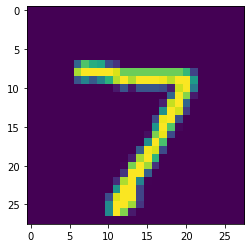

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28,28))

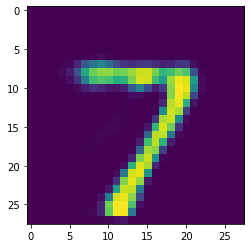

In [6]:
plt.imshow(autoencoder(X_test[0][tf.newaxis]).numpy().reshape(28,28))

#### regularizer
- 급격하게 변하는것을 막음
    - L1,L2: weight decay 
    - kernel, bias regularizer  : overfitting 방지
    - activity regularizer
    
#### activity regularizer
- 표현을 더 간결하게 제한


---

- 200번 epoch 해서 더 실제 이미지와 가깝도록 해야함
-  overfitting되야 더 실제 같음

### Deep Auto-Encoder:
- 여러개의 encoder, decoder를 쌓음stacking
- 추상화 단계가 급격하지 않음
- 딥하면 학습이 잘 안되어 데이터 많이 필요


모델을 레이어로 만들면 유지보수 편함
- 재활용 가능


### Model 상속
- call : build, __call__ [closure technique ]
- composition: 다른 클래스를 클래스 내부에 정의
- 파이썬 객체지향: 접근제한자 없어서 외부에서 접근 가능


- TensorFlow autoencoder(2019): https://www.tensorflow.org/tutorials/generative/autoencoder

In [7]:
latent_dim = 64 

class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    #접근 가능
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(784, activation='sigmoid'),
      tf.keras.layers.Reshape((28, 28))
    ])

  def call(self, x): 
    #접근 불가
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded #return self.decoder(self.encoder(x))

autoencoder = Autoencoder(latent_dim)

In [8]:
autoencoder.encoder  #접근 가능

In [10]:
autoencoder.compile(loss='mse',optimizer='adam')

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0237 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0

In [16]:
autoencoder.encoder(x_test)

<tf.Tensor: shape=(10000, 64), dtype=float32, numpy=
array([[1.1570117 , 4.314016  , 1.4968195 , ..., 1.3828535 , 1.1419623 ,
        0.7940743 ],
       [4.0319014 , 0.        , 5.7508836 , ..., 3.829082  , 9.073799  ,
        6.2815704 ],
       [0.57289726, 3.7839346 , 3.338959  , ..., 0.4978652 , 0.9338678 ,
        1.5739368 ],
       ...,
       [2.689516  , 1.1122463 , 4.3605666 , ..., 6.1248355 , 1.4902534 ,
        1.7909719 ],
       [3.3613734 , 4.4272966 , 0.        , ..., 0.35856962, 0.6296313 ,
        3.1830797 ],
       [1.8812144 , 2.131925  , 3.112015  , ..., 1.250097  , 1.0856222 ,
        1.4960116 ]], dtype=float32)>

### 이미지 denoising 
- 이미지의 noise를 제거

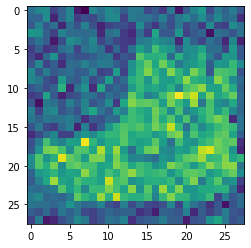

In [17]:
x_train_noise=x_train +0.3 *tf.random.normal(shape=x_train.shape)
plt.imshow(x_train_noise[0].numpy())

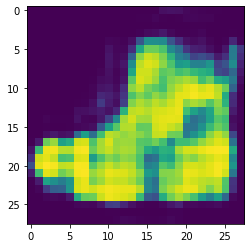

In [18]:
t=autoencoder(x_train_noise[0].numpy()[tf.newaxis]).numpy()
plt.imshow(t.reshape(28,28))

### DCautoencoder
- Deep Convolution autoencoder
    - Fully connected 를 convolution으로 교체

- 성능이 압도적으로 좋음
- pooling대신 strides
- padding = valid, same
- Conv2DTranspose :deconvolution 컨볼루션의 반대

In [20]:
from tensorflow.keras import layers

class DCAutoencoder(tf.keras.Model):
  def __init__(self):
    super( ).__init__()
    
    self.encoder = tf.keras.Sequential([
        tf.keras.Input(shape=(28,28,1)), #build 에서 모양 미리 결정
        tf.keras.layers.Conv2D(64,3,activation='relu',
                              padding='same',strides=2),
        tf.keras.layers.Conv2D(32,3,activation='relu',
                               padding='same',strides=2)
    ])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(32,3, padding='same',strides=2), 
        tf.keras.layers.Conv2DTranspose(64,6, padding='same',strides=2), 
        tf.keras.layers.Conv2D(1,3,activation='sigmoid',padding='same')
    ])

  def call(self, x): 
     return self.decoder(self.encoder(x))
    

input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)
dcautoencoder=DCAutoencoder()

In [21]:
dcautoencoder.compile(loss='binary_crossentropy',optimizer='adam')
X_train=X_train.reshape(-1,28,28,1)
dcautoencoder.fit(X_train, X_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0705
Epoch 2/2
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0610


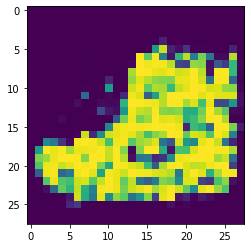

In [22]:
t=dcautoencoder(x_train_noise[0].numpy()[tf.newaxis]).numpy()
plt.imshow(t.reshape(28,28))

### Convolutional VAE
- 참고 : https://www.tensorflow.org/tutorials/generative/cvae
    - VAE 추정 기법 사용해서 GAN과 같이 원하는 데이터 파라미터 조작해서 만듦
    
---

## GAN
- generative adversarial Network
> - 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어 -얀르쿤-

> - discriminant model vs generative model
    - discriminant model: decision boundary 찾음
    - generative model : 숨어있는 확률 분포를 찾아서 분포와 설질이 비슷한 데이터 생성
    
Adversarial
- 적대적 경쟁 관계
    - 어떻게 하면 진짜 와인과 가짜 와인을 구별해서 안 속을 까
    속다가 안속게 되는 경우더 정교하게 속일려고
    속이는 애와 탐지하는 애 
    경쟁시켜서 가짜를 진짜에 가깝게 만들게됨
- 학습이 잘 안되어서 학습테크닉 중요
- 임의의 분포 -> generator -> 가짜이미지 생성 -> Discriminator -> 진/가품
    - 답에따라서 더 정교하게 학습
    - zero-sum: generator 생성 능력 - discrimiantor 구별 능력

> 이미지 라이브러리:imageio, skimage,scipy

### imageio
- 이미지 input,output  

---

### DCGAN
- Deep Convolution generative adversarial Network 심층 합성곱 생성적 적대 신경망


- GAN 참고:https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko

In [23]:
import time
import glob
import PIL
import imageio
import numpy as np
import os

from IPython import display

In [24]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 


sigmoid ziazag현상 
- 0~1사이로 항상 양수값만 나옴

- zero-centered, tanh 이용해서 학습이 더 잘되도록 함
    - search space 2배

In [25]:
tf.cast(x,tf.float32) #새로운 타입으로 만듦

<tf.Tensor 'up_sampling2d_5/resize/ResizeNearestNeighbor:0' shape=(None, 28, 28, 16) dtype=float32>

In [51]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
#256 batch
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [26]:
s=tf.data.Dataset.from_tensor_slices(train_images)
 # 2차원 : 모델에 사용에 편이
t=tf.data.Dataset.from_tensors(train_images)
# 3차원 #데이터 관리에 편이

### generator

- bias 사용하지 않아 더 간단한 모델
- BatchNormalization 학습이 잘 되기 위해서 activation 이전에 사용
    - Resnet(2015) 레이어가 깊어질수록 학습이 안 되는 현상
        - batch 나눈거만큼 normalization 해서 152layers 학습
- LeakyReLU
    - ReLU 값 발산, gradient vanishing문제와 비슷 
    - 0 보다 작은 경우 1/100x로 변경
    - activity regularizer 

In [27]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

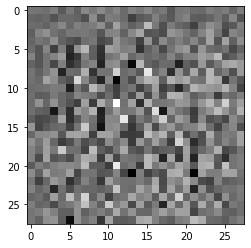

In [28]:
# 훈련이 되지않은 generator
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### discriminator
- convolution 기반 분류기

훈련이 되지않은 discriminator 이용해 이미지를 진짜 + /가짜 - 감별

In [29]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00153244]], shape=(1, 1), dtype=float32)


### 손실함수

### discriminator 손실함수
- multi-loss 어려움
    - 전체 loss에서 trade-off 관계 주의
    > Style Transfer에서 다시 다룰 예정!
> 컨볼루션은 성질을 공유해서 그나마 성능 좋음


### generator 손실함수
- 가짜데이터를 얼마나 실제데이터와 비슷한지( discriminator를 얼마나 잘 속였는지) 수치화

In [30]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    #cross_entropy 함수처럼 사용; 진짜 1 가짜 0으로 이루어진 행렬
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### checkpoint
- 모든 학습 결과값 저장
- keras Tensorboard에 유용

In [32]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

#### callbacks 테크닉
-  tf.keras.callbacks 학습 보조

In [33]:
tf.keras.callbacks.TensorBoard

tensorflow.python.keras.callbacks.TensorBoard

In [34]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs=None):
        print('eoch start -------')
        print(epoch,'++++++++++')
        
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy')
his=model.fit(X_train,y_train,epochs=3,callbacks=[MyCallBack()])

eoch start -------
0 ++++++++++
Epoch 1/3
1875/1875 [==============================] - 1s 552us/step - loss: 1.9994
eoch start -------
1 ++++++++++
Epoch 2/3
1875/1875 [==============================] - 1s 534us/step - loss: 1.2393
eoch start -------
2 ++++++++++
Epoch 3/3
1875/1875 [==============================] - 1s 549us/step - loss: 1.0924


### 학습
- tf.GradientTape 은 loss 새로 만드는것은 학습 
> - fit, fit_generator,train_on_batch, train 기존의 정의된 loss 사용

### tf.GradientTape
- 자동미분하는 방법 중 하나
- 테이프 기록장치에 미분값을 저장

- with context manager 
    - __enter__ , __exit__ 정의됨
    - with 중첩 가능
    - 기존 프레임워크에서 제공하는 loss 가 아닌경우, 확장 하고 싶은 경우 자동미분 제공

> - Automatic Difference in Pytorch
    - No tape

> - Automatic Difference in ML
    - tape


- https://www.tensorflow.org/guide/autodiff?hl=ko

In [38]:
x = tf.Variable((1., 2, 3))

with tf.GradientTape() as tape:
    y=x**2
    zz=tape.gradient(y,x) 
    
zz

# 함수의 미분값을 GradientTape에 저장

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [ ]:
x = tf.Variable((1., 2, 3))

with tf.GradientTape() as tape:
    y=x**2  # 2x -> 2,4,6
z=tape.gradient(y,x) 
z #2,4,6

In [44]:
class X:
    def __enter__(self): #실행
        print('enter')
    def __exit__(self): #구문 벗어날때
        print('exit')

In [45]:
# with int():
#     print('a') #__enter__ 가 클래스에 정의되지않아 사용 못함
    
with X() as f: #인스턴스
    print('a') 

enter
a


TypeError: __exit__() takes 1 positional argument but 4 were given

model.trainable=False

- 전체 파라미터 그대로 
- 학습 가능한 파라미터 0
    - weight, bias 업데이트 못 함
    
    
---

위조범과 판별사가 두개를 동시에 학습하면 잘 안됨

1. 판별사 학습통해 능력 향상 
2. 위조범 학습시켜서 판별사 속일 수 있을 만큼 학습시킴
3. 번갈아가면서 학습하기위해서 trainable/training  변경


### @tf.function
- JIT(Just in Time) 내부적으로 속도 향상 시켜줌
  - script 언어를 미리 컴파일(인터프리터보다 속도향상)
- 항상 좋지 않고 작은 연산에 최적화

In [54]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# (GIF 애니메이션에서 진전 내용을 시각화하는데 쉽기 때문입니다.) 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [55]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
  #disc_tape -> gen_tape 순서로 학습 
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
#loss함수를 w,b로 편미분
      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#optimizer 적용 : zip으로 묶어줌  
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [47]:
from itertools import zip_longest
a=zip([1,2,3,4],[4,5,6])
b=zip_longest([1,2,3,4],[4,5,6])
list(a) #짧은 리스트 기준 원소 묶음

[(1, 4), (2, 5), (3, 6)]

In [48]:
list(b) #가장 긴 리스트 기준 원소 묶음

[(1, 4), (2, 5), (3, 6), (4, None)]

In [56]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # GIF를 위한 이미지를 바로 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크 마다 모델을 저장
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # 에포크마다 얼마나 걸렸는지
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # 마지막 에포크가 끝난 후 생성
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False) #추론

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

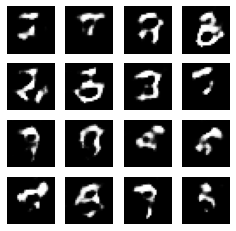

In [58]:
train(train_dataset, 20)

In [59]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #체크포인트 복구

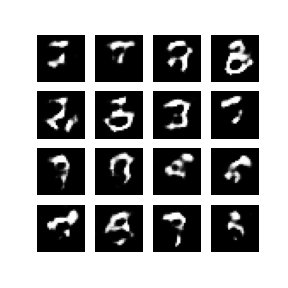

In [61]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

display_image(20)